# Github Link : 

# implement the L1 and L2 regularization for Linear regression using the Ridge and Lasso modules of the Sklearn 

In [39]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [40]:

# Loading the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\Binal Bariya\Desktop\kc_house_data.csv')


In [41]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
#Cleaning the data

# Dropping the numerically non-sensical variables
dropColumns = ['id', 'date', 'zipcode','sqft_above']
data = data.drop(dropColumns, axis = 1)
  
# Separating the dependent and independent variables
y = data['price']
X = data.drop('price', axis = 1)
  
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


#  Building and evaluating the different models

In [44]:
#1) Linear Regression

# Bulding and fitting the Linear Regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
  
# Evaluating the Linear Regression model
print(linearModel.score(X_test, y_test))

0.697131882464068


# Lasso(L1) Regression

In [45]:

# List to maintain the cross-validation scores
cross_val_scores_lasso = []
  
# List to maintain the different values of Lambda
Lambda = []
  
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
  


In [46]:
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 69.08930606738566
0.5 : 69.0893115713069
0.75 : 69.08931704585153
1.0 : 69.08932249597726
1.25 : 69.08932791842865
1.5 : 69.08933331350491
1.75 : 69.08933868275072
2.0 : 69.08934402400368


In [47]:
#From the above output, we can conclude that the best value of lambda is 2

In [48]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
  
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test, y_test))

0.6971332950727083


# Ridge(L2) Regression

In [49]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
  
# List to maintain the different values of alpha
alpha = []
  
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

In [50]:

  
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 69.08949708276658
0.5 : 69.08967368537839
0.75 : 69.0898305535347
1.0 : 69.08996788999437
1.25 : 69.09008589519252
1.5 : 69.09018476727104
1.75 : 69.0902647021098
2.0 : 69.09032589335607


In [51]:
#From the above output, we can conclude that the best value of alpha for the data is 2.

In [52]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
  
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.6971783334250773


# Comparing and Visualizing the results

In [55]:
# Building the two lists for visualization
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [linearModel.score(X_test, y_test),
         ridgeModelChosen.score(X_test, y_test),
         lassoModelChosen.score(X_test, y_test)]
  
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test)
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test)
  
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Linear Regreesion : 0.697131882464068
Lasso Regression : 0.6971332950727083
Ridge Regreesion : 0.6971783334250773


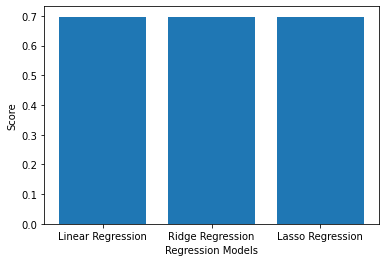

In [54]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()